In [1]:
fn1 = "Rafael"
ln1 = "Brutti"
filename = "_".join(map(lambda s: s.strip().lower(),
                        ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

In [2]:
import csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statistics
import copy

# Exercice 1

### Question 1.

Number of covariates : 506
Measurements : 100


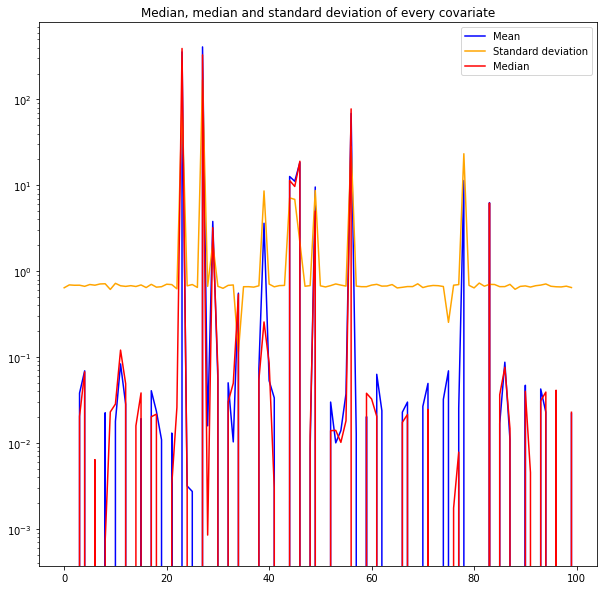

In [3]:
#Loading of the data
df = pd.read_csv('data_tp_2.csv')
Y = df.Y
df = df.drop('Y',axis=1)
X = df.values
Xt = df
n,p = X.shape
print("Number of covariates :", n)
print("Measurements :", p)

#Plot of the median, mean and standard deviation
plt.figure(figsize=(10,10))
plt.title("Median, median and standard deviation of every covariate")
plt.plot(X.mean(axis=0), label = "Mean", color = "blue")
plt.plot(X.std(axis=0), label = "Standard deviation", color = "orange")
plt.plot(np.median(X,axis=0), label = "Median", color = "red")

plt.yscale('log')
plt.legend()
plt.show()

I observe that the data is :
- Not centered because the mean goes from 0 to 4.10² 
- Not normalized because the values are not between 0 and 1
- Not standardized because the standard deviation is not 1

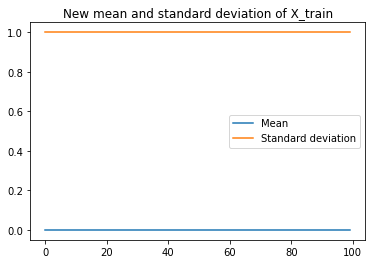

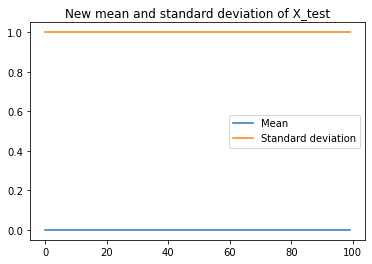

In [4]:
#Separation of the covariate in train and test sets.
#I set random_state to 0 to check my results with others
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0)
df_test = pd.DataFrame()
df_coef = pd.DataFrame()
results = []

plt.title("New mean and standard deviation of X_train")
X_train = StandardScaler().fit_transform(X_train)
plt.plot(X_train.mean(axis=0), label = "Mean")
plt.plot(X_train.std(axis=0), label = "Standard deviation")
plt.legend()
plt.show()

plt.title("New mean and standard deviation of X_test")
X_test = StandardScaler().fit_transform(X_test)
plt.plot(X_test.mean(axis=0), label = "Mean")
plt.plot(X_test.std(axis=0), label = "Standard deviation")
plt.legend()
plt.show()

#### Why is it important that the variables are scaled ? 

The variables must be scaled because it is important to work with the same kind of data in order to keep consistency (ex: Temperature in °C or in °F). Moreover, the $\ell_1$-penalty of the LASSO objective function allows to shrink to 0 the coefficients in $\hatθ_{LASSO}$ associated to the variables that are useless to predict Y and if the variables are not scaled the intercept is also shrunk to 0. Finally, if the variables are scaled, we don't have to compute the intercept.

### Question 2.

In [5]:
#Determination coefficient
def R2(Y_pred, Y_test) :
    return 1 - np.sum((Y_pred - Y_test)**2)/np.sum((Y_test - np.mean(Y_test))**2)

#Mean squared error
def mean_squared_error(Y_pred, Y_test):
    return np.mean((Y_pred - Y_test)**2)
    

### Question 3.

In [6]:
from sklearn import linear_model
from sklearn import metrics

In [7]:
#Linear Regression
regLinear = linear_model.LinearRegression()
OLS = regLinear.fit(X_train,Y_train)
Y_predLinear = regLinear.predict(X_test)


In [8]:
#I transform Y_test which is a df in a array for computations
Y2 = copy.deepcopy(Y_test)
Y2 = Y2.to_numpy()

In [9]:
print(" The MSE is :", mean_squared_error(Y_predLinear,Y_test))
print("The sklearn MSE is :", metrics.mean_squared_error(Y_predLinear, Y_test))
print(" R² is :", R2(Y_predLinear, Y2))
print("The sklearn R² :", metrics.r2_score(Y_test, Y_predLinear))

 The MSE is : 37.70530085856645
The sklearn MSE is : 37.705300858566474
 R² is : 0.5384852478771162
The sklearn R² : 0.5384852478771162


I notice that my results are similar to those from the sklearn library functions so my functions are well implemented.

In [10]:
#Adding columns to the dataframe
df_test['OLS'] = Y_predLinear
df_coef['OLS'] = regLinear.coef_

### Question 4.

In [11]:
import seaborn as sns

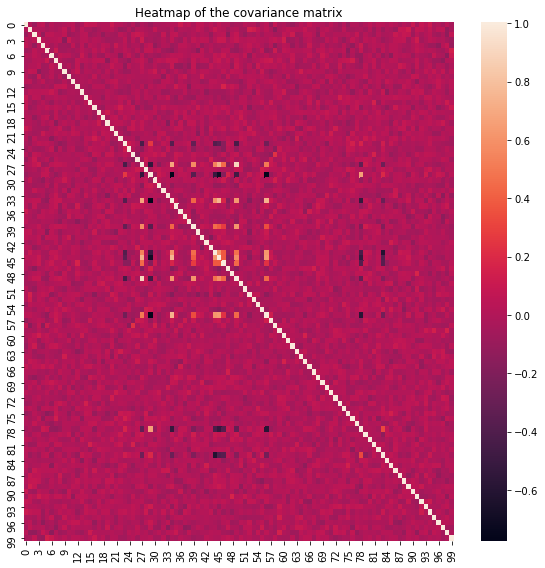

In [12]:
plt.figure(figsize=(8,8))

#Plot of the heatmap matrix
M =np.cov(X_train.T)
hm = sns.heatmap(M)
plt.title('Heatmap of the covariance matrix')
plt.tight_layout()
plt.show()

I notice a symmetry in relation to the diagonal, which is normal since it is a covariance matrix. We see that the values on the diagonal are equal to 1 which is normal because the variances are standardized. Moreover, most of the coefficients are zero because the variables are decorrelated and non-zero ones show that some variables are correlated.

In [13]:
#Computation of the singular value decomposition 
U, s, V = np.linalg.svd(M)

### Question 5.

In [14]:
from sklearn.decomposition import PCA

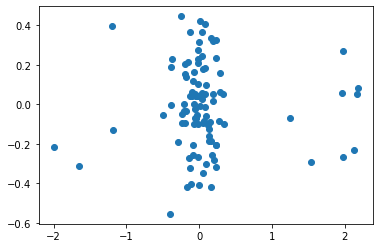

In [15]:
PCs = (U * s)[:, :2]
plt.scatter(PCs[:, 0], PCs[:, 1])
plt.show()

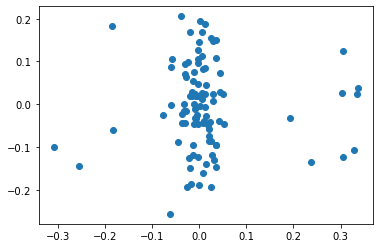

In [16]:
pca = PCA(n_components = 2)
reduced_X_train = pca.fit_transform(X_train)
plt.scatter(pca.components_[0], pca.components_[1])
plt.show()

The graphs are consistent.

### Question 6.

In [17]:
#Projected data
X_trainlow = X_train @ U[:,:2]
X_testlow = X_test @ U[:,:2]
#Linear Regression
regOLS_PCA = linear_model.LinearRegression()
OLS = regOLS_PCA.fit(X_trainlow,Y_train)
Y_predOLS_PCA = regOLS_PCA.predict(X_testlow)

In [18]:
print(" The MSE is :", mean_squared_error(Y_predOLS_PCA,Y_test))
print("The sklearn MSE is :", metrics.mean_squared_error(Y_predOLS_PCA, Y_test))
print(" R² is :", R2(Y_predOLS_PCA, Y2))
print("The sklearn R² :", metrics.r2_score(Y_test, Y_predOLS_PCA))

 The MSE is : 64.24069635370323
The sklearn MSE is : 64.24069635370323
 R² is : 0.21369069126138807
The sklearn R² : 0.21369069126138807


In [19]:
#Adding column PCA
df_test['pca_ols'] = Y_predOLS_PCA

### Question 7.

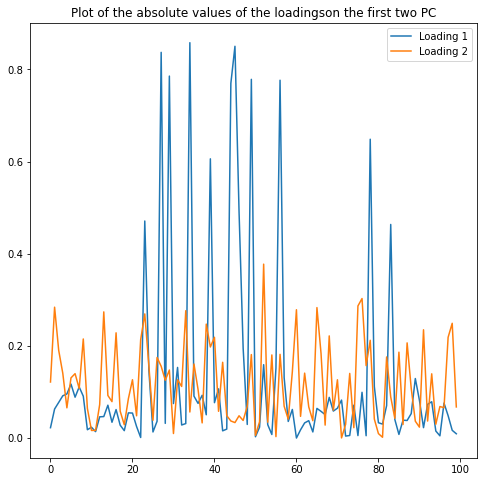

In [20]:
plt.figure(figsize=(8,8))
plt.title("Plot of the absolute values of the loadingson the first two PC")
loadings = abs(pca.components_.T * np.sqrt(pca.explained_variance_))
plt.plot(loadings[:,0], label = "Loading 1")
plt.plot(loadings[:,1], label = "Loading 2")
plt.legend()
plt.show()

In [21]:
#DataFrame representation
loading_matrix = pd.DataFrame(loadings, columns = ['PC1', 'PC2'])
loading_matrix

,PC1,PC2
0,0.022472,0.121621
1,0.063011,0.283989
2,0.077309,0.190490
3,0.091728,0.140543
4,0.095679,0.065595
...,...,...
95,0.004874,0.068433
96,0.075875,0.065870
97,0.048569,0.218599
98,0.016815,0.249035


### Question 8.

In [22]:
from sklearn.linear_model import LassoCV

In [23]:
#Application of the LassoCV of the sklearn library
regLasso = LassoCV(alphas = np.logspace(-3,1,30))
Lasso = regLasso.fit(X_train, Y_train)
Y_predLasso = regLasso.predict(X_test)

In [24]:
print(" The MSE is :", mean_squared_error(Y_predLasso,Y_test))
print("The sklearn MSE is :", metrics.mean_squared_error(Y_predLasso, Y_test))
print(" R² is :", R2(Y_predLasso, Y2))
print("The sklearn R² :", metrics.r2_score(Y_test, Y_predLasso))

 The MSE is : 34.596835904498036
The sklearn MSE is : 34.596835904498036
 R² is : 0.5765330130478755
The sklearn R² : 0.5765330130478755


In [25]:
print("The regularization parameter is :", regLasso.alpha_)

The regularization parameter is : 0.2212216291070448


In [26]:
df_test['Lasso'] = Y_predLasso
df_coef['Lasso'] = regLasso.coef_

### Question 9. 

In [27]:
from sklearn.linear_model import RidgeCV

In [28]:
#Application of the RidgeCV of the sklearn library
regRidge = RidgeCV(alphas = np.logspace(-1,2,30))
Ridge = regRidge.fit(X_train, Y_train)
Y_predRidge = regRidge.predict(X_test)

In [29]:
print(" The MSE is :", mean_squared_error(Y_predRidge,Y_test))
print("The sklearn MSE is :", metrics.mean_squared_error(Y_predRidge, Y_test))
print(" R² is :", R2(Y_predRidge, Y2))
print("The sklearn R² :", metrics.r2_score(Y_test, Y_predRidge))

 The MSE is : 37.94354317473471
The sklearn MSE is : 37.943543174734685
 R² is : 0.535569150113993
The sklearn R² : 0.535569150113993


In [30]:
print("The regularization parameter is :", regRidge.alpha_)

The regularization parameter is : 48.93900918477494


In [31]:
#Adding of columns
df_test['Ridge'] = Y_predRidge
df_coef['Ridge'] = regRidge.coef_

### Question 10.

In [32]:
from scipy.stats import norm, t

In [33]:
def forward_variable_selection(X,Y, stopcriterion):

   
    n = X.shape[0]
    p = X.shape[1]
    
    #I add a column of "1" for the intercept
    ones = np.ones((n,1))
    X_ones = np.column_stack((ones, X))

    
    r = Y
    #Variables added
    S = [] 
    #Variables to add
    A = [k for k in range(p)] 
    
    #List of indices from the FVS
    indexOfVariablesSelected = []

     
    #Initialization of p-values and tests
    #Each line is a step and the columns are values
    T_n = np.zeros((p,p))
    p_values = np.ones((p,p))
    columnsSelected = []

    #Linear Regression
    regLinFVS = linear_model.LinearRegression()

    for k in range(p): 
        residuals = np.zeros((n,p))
        for var in A:
            
            #Linear regression 
            regLinFVS.fit(X_ones[:,[var+1]],r) #The columns of 1 is not relevant while the data is centered
        
            #We evaluate the residuals
            residuals[:,var] = r - regLinFVS.predict(X_ones[:,[var+1]])
        
            # Works out sigma² * s²
            sigma_and_snk_2 = (np.sum(residuals[:,var]**2)/(n-2))*(n/np.sum(X_ones[:,var+1]**2))
        
             # Compute the test and the p-value (cf. course) associated to each variable at step k
            T_n[k, var] = (n**0.5) * np.abs(regLinFVS.coef_)/np.sqrt(sigma_and_snk_2)
            p_values[k, var] = 2*(1-norm.cdf(T_n[k,var]))
        
    
    
        min_p_value = np.min(p_values[k,:])
        if (min_p_value>=stopcriterion):
            
            #Only the selected variables are taken
            T_n = T_n[0:k+1, 0:k+1]
            break;
        else : 
            #Selects the variable which is the most relevant
            best_var = np.argmax(T_n[k,:])
            #Best_var is chosen we remove it from A
            A.remove(best_var) 
            indexOfVariablesSelected.append(best_var)
            #Rewriting in columns of X
            columnsSelected.append('X'+ str(best_var))
            r = residuals[:,best_var]
    
    return indexOfVariablesSelected, columnsSelected, p_values, T_n

In [34]:
#Setting the stop criterion at 1 is similar to not considering a stop criterion because the p-values are between 0 and 1.
indexOfVariablesSelected_wsc, columnsSelected_wsc, p_values_wsc, T_n_wsc = forward_variable_selection(X_train,Y_train,1)

print("The order of the variable selection using the forward variable selection without stop criterion :")
print(indexOfVariablesSelected_wsc)

The order of the variable selection using the forward variable selection without stop criterion :
[44, 46, 29, 83, 62, 28, 9, 22, 33, 75, 24, 66, 15, 63, 20, 10, 76, 97, 4, 34, 56, 88, 53, 51, 25, 18, 47, 90, 58, 91, 16, 99, 5, 82, 31, 78, 17, 92, 36, 42, 38, 52, 21, 77, 73, 86, 6, 8, 40, 3, 94, 89, 61, 11, 7, 96, 95, 48, 43, 41, 49, 27, 45, 87, 54, 93, 60, 57, 67, 2, 39, 69, 19, 70, 14, 68, 59, 98, 32, 26, 81, 37, 79, 50, 0, 1, 85, 64, 12, 55, 30, 71, 74, 84, 80, 23, 35, 65, 13, 72]


### Question 11.

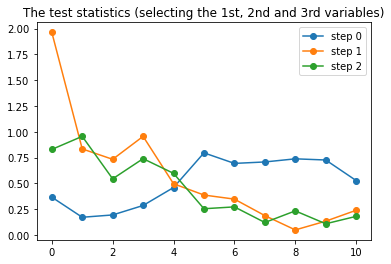

In [35]:
indexOfVariablesSelected, columnsSelected, p_values, T_n = forward_variable_selection(X_train,Y_train,0.05)
plt.title("The test statistics (selecting the 1st, 2nd and 3rd variables)")
plt.plot(T_n[:,0], "-o", label = "step 0")
plt.plot(T_n[:,1], "-o", label = "step 1")
plt.plot(T_n[:,2], "-o", label = "step 2")
plt.legend()
plt.show()

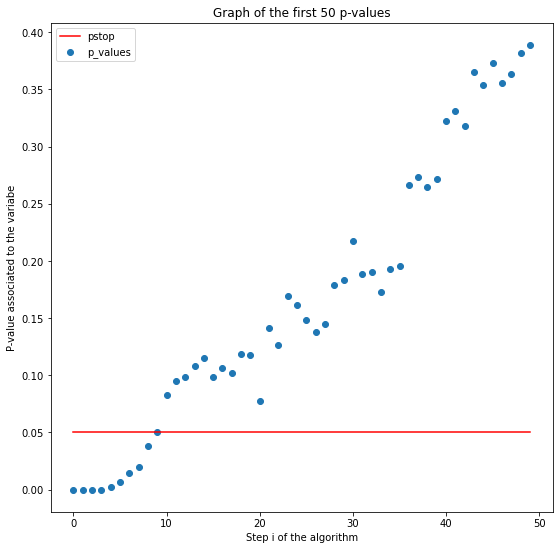

In [36]:
p_values_selection = [] #stocks the p-values in the same order than the variables were added through the algorithm 
step = 0

#selects the first 50 p-values
for var in indexOfVariablesSelected_wsc : 
    p_values_selection.append(p_values_wsc[step, var])
    step = step+1;
    if (step==50):
        break;
        
plt.figure(figsize =(9,9))
plt.title("Graph of the first 50 p-values")
x_axes = np.arange(50)
plt.scatter(x_axes, p_values_selection, label = "p_values")
plt.plot(x_axes, [0.05 for k in x_axes], color = "red", label = "pstop")
plt.xlabel("Step i of the algorithm")
plt.ylabel("P-value associated to the variabe")
plt.legend()
plt.show()

In [37]:
print("The order of the variable selection using the forward variable selection with 0.05 as a stop criterion :")
print(indexOfVariablesSelected)
print(columnsSelected)

The order of the variable selection using the forward variable selection with 0.05 as a stop criterion :
[44, 46, 29, 83, 62, 28, 9, 22, 33, 75]
['X44', 'X46', 'X29', 'X83', 'X62', 'X28', 'X9', 'X22', 'X33', 'X75']


### Question 12.

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
regLin2 = linear_model.LinearRegression()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = Xt.columns)
X_train_selected = X_train[columnsSelected]
OLS = regLin2.fit(X_train_selected,Y_train)
X_test_varselected = pd.DataFrame(scaler.fit_transform(X_test),columns = Xt.columns)
X_test_varselected = X_test_varselected[columnsSelected]
Y_predFVS = regLin2.predict(X_test_varselected)

In [40]:
#I only consider the coefficients of the FVS and I set the others at 0
tab = np.zeros(100)
i = 0
for var in columnsSelected:
    tab[list(X_train.columns).index(var)] = regLin2.coef_[i]
    i += 1

In [41]:
print(" The MSE is :", mean_squared_error(Y_predFVS,Y_test))
print("The sklearn MSE is :", metrics.mean_squared_error(Y_predFVS, Y_test))
print(" R² is :", R2(Y_predFVS, Y2))
print("The sklearn R² :", metrics.r2_score(Y_test, Y_predFVS))

 The MSE is : 75.41170887827448
The sklearn MSE is : 75.41170887827447
 R² is : 0.07695694404696174
The sklearn R² : 0.07695694404696174


In [42]:
df_test['FVS'] = Y_predFVS
df_coef['FVS'] = tab

### Question 13.

The best method that minimizes the most the MSE and maximises the most the determination coefficient is the Lasso Method. However, OLS and Ridge's method remain interesting, then the PCA before OLS has much less good results and finally the FVS  is the last one.

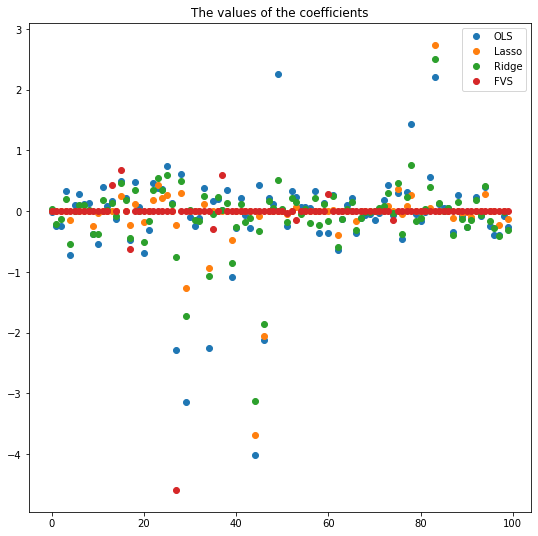

In [43]:
df_coef.plot(linestyle='',marker='o', figsize = (9,9))
plt.title("The values of the coefficients")
plt.show()

I observe that the FVS method and the Lasso method set a lot of coefficients at 0.

### Question 14.

In [44]:
zero_OLS = 0 
zero_Lasso = 0 
zero_Ridge = 0 
zero_FVS = 0
for i in range (len(df_coef)):
    OLS, Lasso, Ridge,  FVS = df_coef.iloc[i]
    if (OLS == 0):
        zero_OLS += 1
    if(Lasso == 0):
        zero_Lasso += 1
    if (Ridge == 0):
        zero_Ridge += 1
    if (FVS == 0):
        zero_FVS += 1
print("Number of coefficients set to 0 with OLS :", zero_OLS)
print("Number of coefficients set to 0 with Ridge :", zero_Ridge)
print("Number of coefficients set to 0 with Lasso :", zero_Lasso)
print("Number of coefficients set to 0 with FVS :", zero_FVS)  

Number of coefficients set to 0 with OLS : 0
Number of coefficients set to 0 with Ridge : 0
Number of coefficients set to 0 with Lasso : 61
Number of coefficients set to 0 with FVS : 90


Ridge is adding a regularization term to the square loss of OLS, aiming to penalize for large coefficients in θ.

In contrast with the Ridge approach, the $l_1$-penalty of the LASSO objective function allows to shrink
to 0 the coefficients in $\hat{\theta}_{LASSO}$ associated to the variables that are useless to predict Y .


### Question 15.

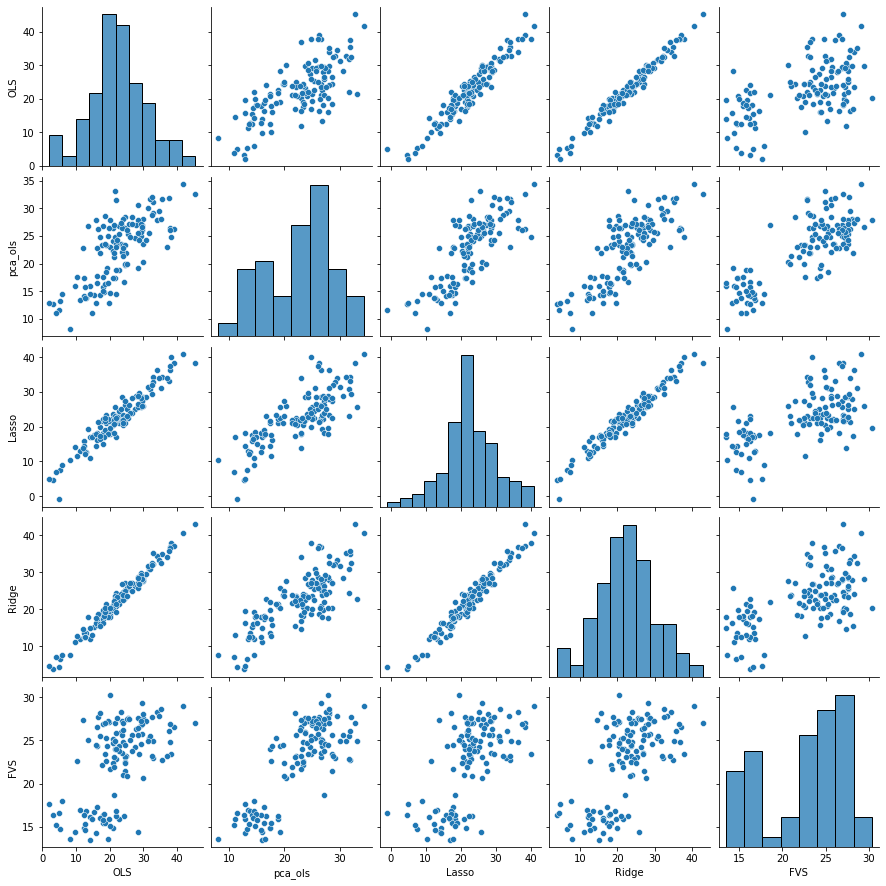

In [45]:
sns.pairplot(df_test)
plt.show()

If we want to predict the value of a new, unseen data point x, we compute : $x^T \theta^{lasso}$

Indeed, even if the RidgeCV and the LassoCV show good results, the Lasso method set 61% coefficients to 0, which considerably simplifies computations.

In addition, Lasso is more interesting than the FVS even if the FVS puts at 0 90% of the coefficients because it takes much less computing time and its result is more precise.